# Analyzer for individual .json results

In [42]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib

In [43]:
# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']

In [44]:
#execute if source is csv
df = pd.read_csv (r'C:\Users\aron\Google Drive\BA\thesis\data_analysis\Database_AllParticipants_av_experiment_122522_2021-04-09_19h22.32_f14f0700-9968-11eb-a6c2-ac1f6b405aea.csv')
df.head()

,videoPath,SJ_trials_skip.thisRepN,SJ_trials_after.thisIndex,SJ_trials_between.ran,SJ_trials_before.thisRepN,training.thisTrialN,trials.thisTrialN,SJ_trials_between.thisIndex,block_counter_sj,attribute2,...,SJ_trials_before.thisTrialN,training.thisRepN,group,s_adjust.ran,s_adjust.thisN,fill_attribute,cont_4.rt,frameRate,expName,cont_6.rt
0,﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1.0,0.0,NaN,NaN,59.898173,av_experiment,NaN
1,﻿choice_videos/4_072.mp4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,hübsch,...,NaN,0.0,0,NaN,NaN,alt,0.95177,59.898173,av_experiment,NaN
2,﻿choice_videos/1_016.mp4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,frech,...,NaN,0.0,0,NaN,NaN,rüde,NaN,59.898173,av_experiment,NaN
3,﻿choice_videos/3_011.mp4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,träge,...,NaN,0.0,0,NaN,NaN,alt,NaN,59.898173,av_experiment,NaN
4,﻿choice_videos/2_055.mp4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,klug,...,NaN,0.0,0,NaN,NaN,dick,NaN,59.898173,av_experiment,NaN


In [45]:
#cut down df to individual participant
df = df[df['participant'] == 22]
df.shape

(198, 102)

In [46]:
# Here we can see all tracked variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 592 to 789
Columns: 102 entries, videoPath to cont_6.rt
dtypes: float64(63), int64(5), object(34)
memory usage: 159.3+ KB


## General Info

In [47]:
df.describe()

,SJ_trials_skip.thisRepN,SJ_trials_after.thisIndex,SJ_trials_between.ran,SJ_trials_before.thisRepN,training.thisTrialN,trials.thisTrialN,SJ_trials_between.thisIndex,block_counter_sj,s_adjust.thisRepN,SJ_trials_skip.thisTrialN,...,SJ_trials_after.ran,training.thisIndex,SJ_trials_before.thisTrialN,training.thisRepN,group,s_adjust.ran,s_adjust.thisN,cont_4.rt,frameRate,cont_6.rt
count,1.0,10.00000,10.0,10.0,4.000000,160.000000,10.00000,30.000000,2.000000,1.0,...,10.0,4.000000,10.00000,4.0,198.0,2.0,2.000000,1.000,198.00000,1.000
mean,0.0,4.50000,1.0,0.0,1.500000,79.500000,4.50000,1.000000,0.500000,0.0,...,1.0,1.500000,4.50000,0.0,1.0,1.0,0.500000,6.063,60.02401,10.042
std,NaN,3.02765,0.0,0.0,1.290994,46.332134,3.02765,0.830455,0.707107,NaN,...,0.0,1.290994,3.02765,0.0,0.0,0.0,0.707107,NaN,0.00000,NaN
min,0.0,0.00000,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,1.0,0.000000,0.00000,0.0,1.0,1.0,0.000000,6.063,60.02401,10.042
25%,0.0,2.25000,1.0,0.0,0.750000,39.750000,2.25000,0.000000,0.250000,0.0,...,1.0,0.750000,2.25000,0.0,1.0,1.0,0.250000,6.063,60.02401,10.042
50%,0.0,4.50000,1.0,0.0,1.500000,79.500000,4.50000,1.000000,0.500000,0.0,...,1.0,1.500000,4.50000,0.0,1.0,1.0,0.500000,6.063,60.02401,10.042
75%,0.0,6.75000,1.0,0.0,2.250000,119.250000,6.75000,2.000000,0.750000,0.0,...,1.0,2.250000,6.75000,0.0,1.0,1.0,0.750000,6.063,60.02401,10.042
max,0.0,9.00000,1.0,0.0,3.000000,159.000000,9.00000,2.000000,1.000000,0.0,...,1.0,3.000000,9.00000,0.0,1.0,1.0,1.000000,6.063,60.02401,10.042


In [48]:
list(df.columns)

['videoPath',
 'SJ_trials_skip.thisRepN',
 'SJ_trials_after.thisIndex',
 'SJ_trials_between.ran',
 'SJ_trials_before.thisRepN',
 'training.thisTrialN',
 'trials.thisTrialN',
 'SJ_trials_between.thisIndex',
 'block_counter_sj',
 'attribute2',
 's_adjust.thisRepN',
 'SJ_trials_skip.thisTrialN',
 'response_distortion.keys',
 'cont_6.keys',
 'response_distortion.rt',
 'browser',
 'key_resp.rt',
 'SJ_trials_between.thisN',
 'corrAns',
 'SJ_trials_skip.thisIndex',
 's_adjust.thisTrialN',
 'exit.rt',
 'SJ_trials_before.thisIndex',
 'cont_0.rt',
 'block_counter_choice',
 'trials.thisN',
 'cont_5.keys',
 'cont_7.keys',
 'id',
 'key_resp.keys',
 'psychopyVersion',
 'echo',
 'choice_response.keys',
 'latency',
 'response_sync.corr',
 'item',
 'response_sync.rt',
 'SJ_trials_skip.ran',
 'exit.keys',
 'trial_counter_sj',
 'cont_3.rt',
 'trial_counter_choice',
 'SJ_trials_between.thisTrialN',
 'OS',
 'training.ran',
 'SJ_trials_after.thisRepN',
 'imagePath2',
 'cont_0.keys',
 '__participant',
 'xRes

In [49]:
exp = df['expName'].iloc[0]
print('Exp: ',exp)
os = df['OS'].iloc[0]
print('OS: ',os)
browser = df['browser'].iloc[0]
print('Browser: ',browser)
res = (df['xResolution'].iloc[0], df['yResolution'].iloc[0])
print('Resolution: ',res)
fr = df['frameRate'].iloc[0]
print('Framerate: ',browser)
eid = df['id'].iloc[0]
print('Experiment ID: ',eid)
pid = df['participant'].iloc[0]
print('Participant ID: ',pid)
date = df['date'].iloc[0]
print('Date: ',date)
group = df['group'].iloc[0]
print('Group: ',group)
switch = df['target_loc'].median() ==  1
print('Images reversed: ',switch)
trials_ = df['trials.ran'].count()


Exp:  av_experiment
OS:  Win32
Browser:  Firefox
Resolution:  (1366, 768)
Framerate:  Firefox
Experiment ID:  test
Participant ID:  22
Date:  2021-04-09_20h45.51.373
Group:  1
Images reversed:  True


# Analysis of choice trial

Text(0.5, 1.0, 'Distribution of Choice RT overall')

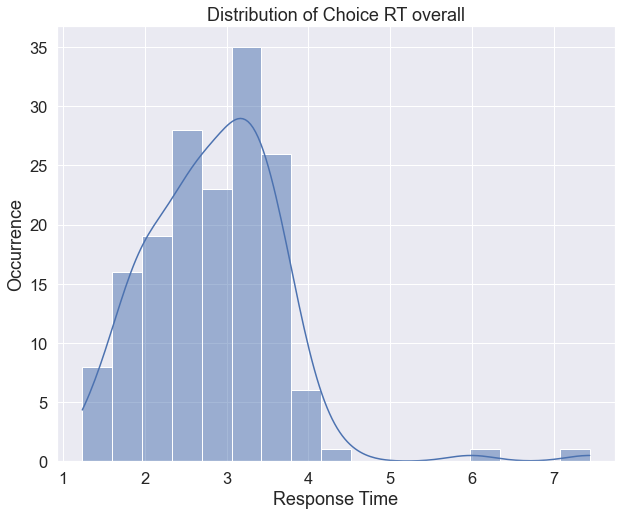

In [50]:
rt = df['choice_response.rt']

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.histplot(rt, kde=True)

# Change Axis labels:
plt.xlabel('Response Time')
plt.ylabel('Occurrence')
plt.title('Distribution of Choice RT overall')

In [51]:
trials = df['trials.ran'].count()
trials

160

 Means over conditions:  cond
0.0    2.615710
1.0    2.790333
2.0    3.242576
3.0    2.675697
4.0    2.926676
Name: choice_response.rt, dtype: float64


Text(0.5, 1.0, 'Response times over conditions in choice trial')

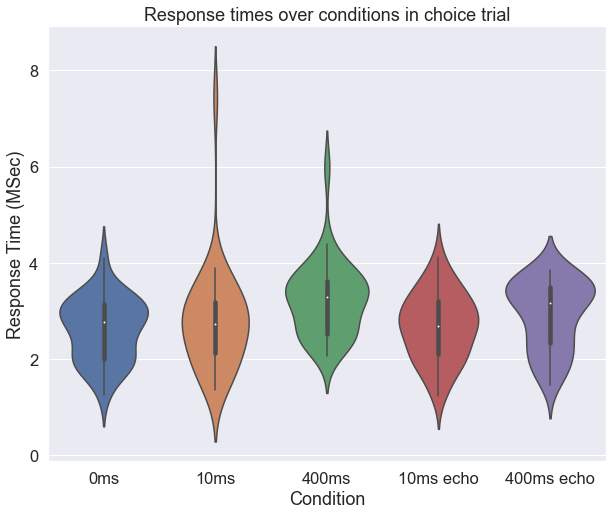

In [52]:
means_by_cond = df.groupby('cond')['choice_response.rt'].mean()
print(' Means over conditions: ', means_by_cond)

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.violinplot(y='choice_response.rt', 
               x="cond",
              data=df,
              showmeans=True).set_xticklabels(condition_values)

# Change Axis labels:
plt.xlabel('Condition')
plt.ylabel('Response Time (MSec)')
plt.title('Response times over conditions in choice trial')

Text(0.5, 1.0, 'Response times over different conditions')

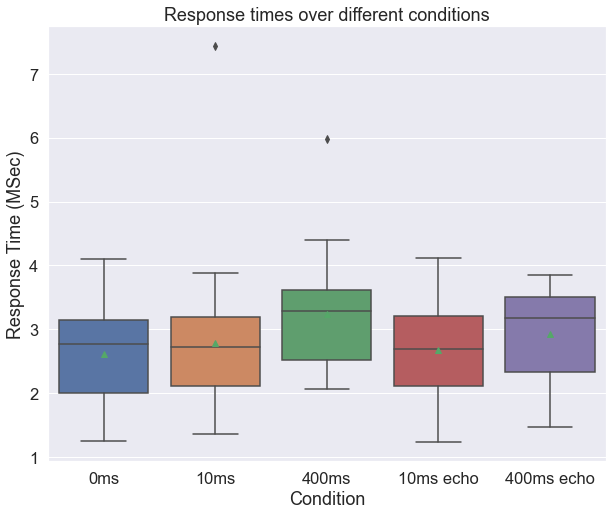

In [53]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.boxplot(y='choice_response.rt', x="cond",
              data=df,
           showmeans=True).set_xticklabels(condition_values)

# Change Axis labels:
plt.xlabel('Condition')
plt.ylabel('Response Time (MSec)')
plt.title('Response times over different conditions')

Text(0.5, 1.0, 'Correct Responses over conditions in choice trial')

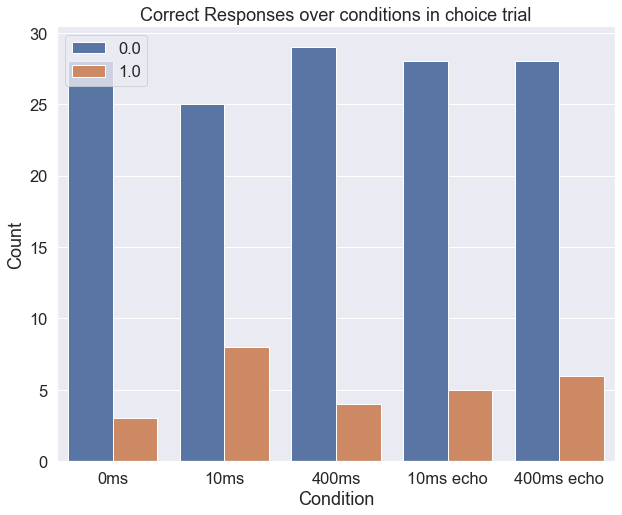

In [54]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)



sns.countplot(hue='choice_response.corr', x="cond",
              data=df).set_xticklabels(condition_values)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Correct Responses over conditions in choice trial')

## Response Time over experiment Progress

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over all trials')

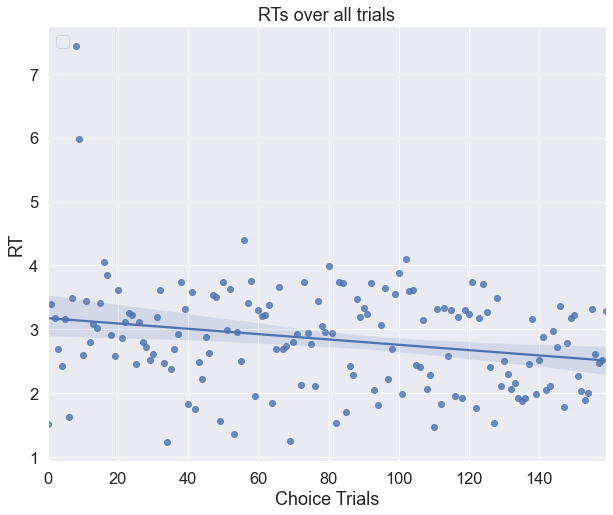

In [55]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over all trials')


No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over all trials')

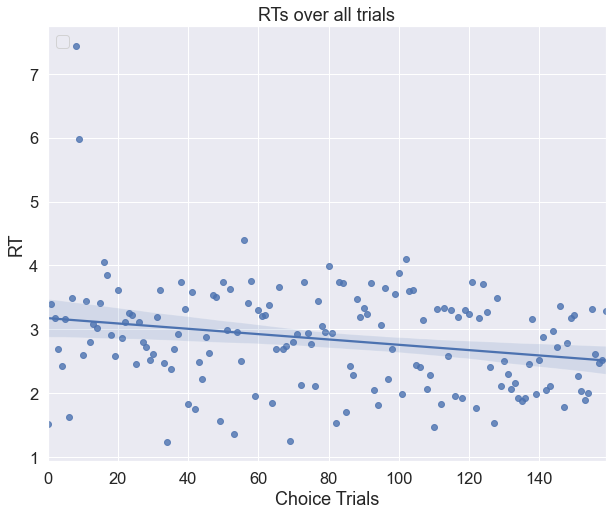

In [56]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over all trials')


In [57]:
# Filter out incorrect responses
df_corr = df.drop(df[df['choice_response.corr'] == 0].index)
df_corr = df_corr.drop(df_corr[df_corr['target_loc'] == 2].index)
df_corr.shape

(42, 102)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over correctly answered non-filler trials')

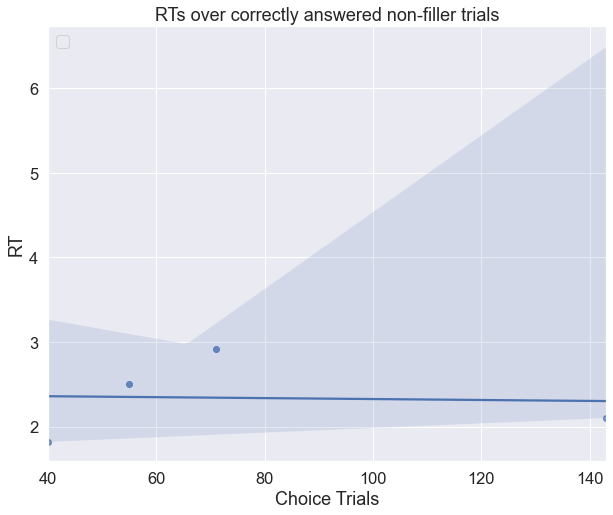

In [58]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df_corr)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over correctly answered non-filler trials')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over filler trials')

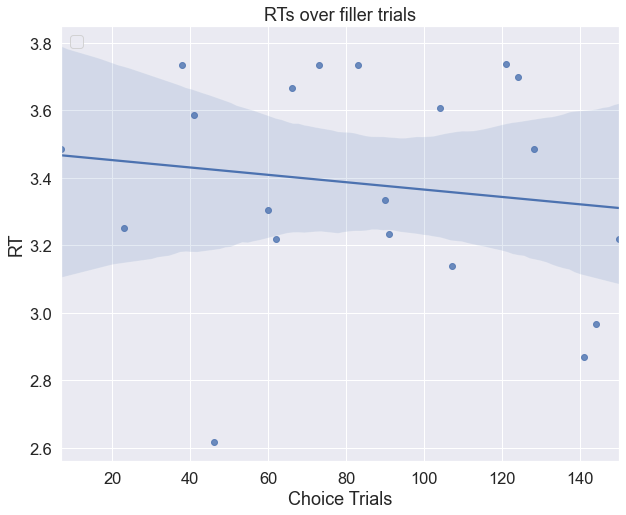

In [59]:
# Filter out incorrect responses
df_filler = df.drop(df[df['target_loc'] < 2].index)
df_filler['target_loc'].unique()

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df_filler)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over filler trials')

Text(0.5, 1.0, 'Correct Responses over conditions in filler trials')

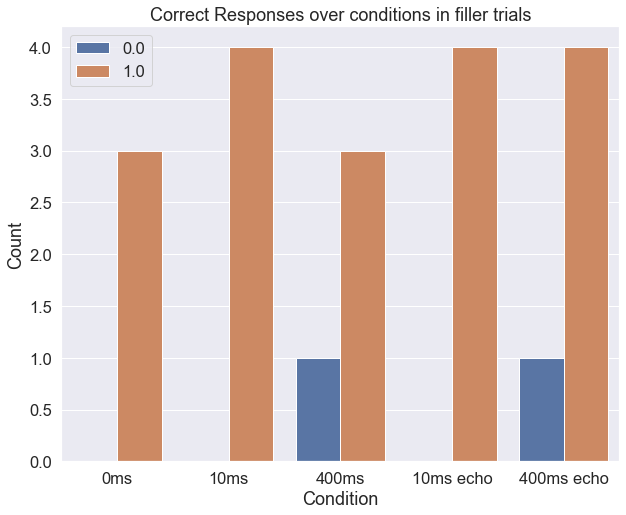

In [60]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.countplot(hue='choice_response.corr', x="cond",
              data=df_filler).set_xticklabels(condition_values)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Correct Responses over conditions in filler trials')

Text(0.5, 1.0, 'Correct / Incorrect RTs over all trials')

<Figure size 720x576 with 0 Axes>

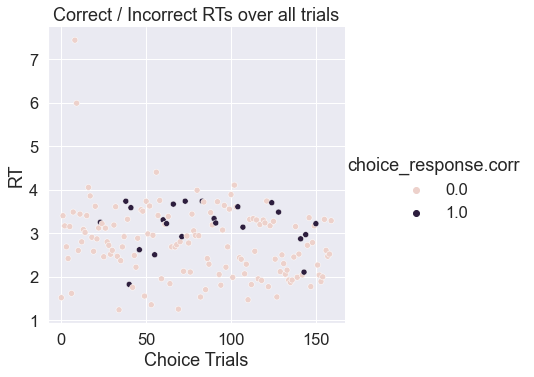

In [61]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.relplot(y='choice_response.rt',  x='trials.thisTrialN', hue="choice_response.corr", data=df);

# Change Axis labels:
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('Correct / Incorrect RTs over all trials')

# Analysis of SJ task

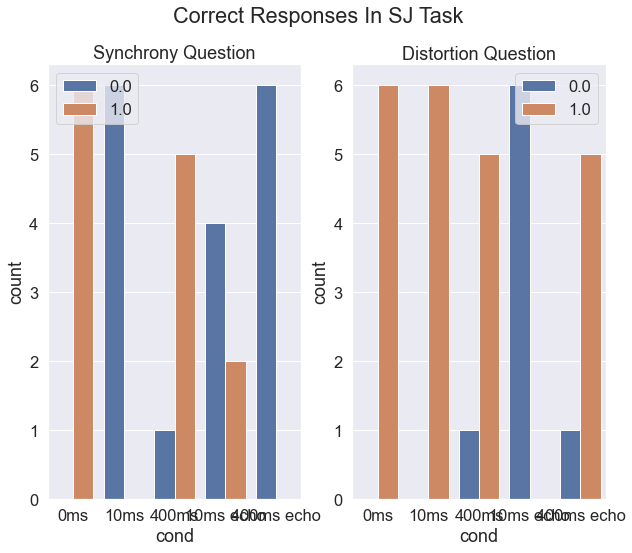

In [62]:
fig, axes = plt.subplots(1, 2)
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


fig.suptitle('Correct Responses In SJ Task')
axes[0].set_title('Synchrony Question')
axes[1].set_title('Distortion Question')

sns.countplot(ax=axes[0],hue='response_sync.corr', x="cond",data=df).set_xticklabels(condition_values)
sns.countplot(ax=axes[1],hue='response_distortion.corr', x="cond",data=df).set_xticklabels(condition_values)

# Change Axis labels:
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper right')


Text(0.5, 0.98, 'Correctness of SJ synchrony answers over trials')

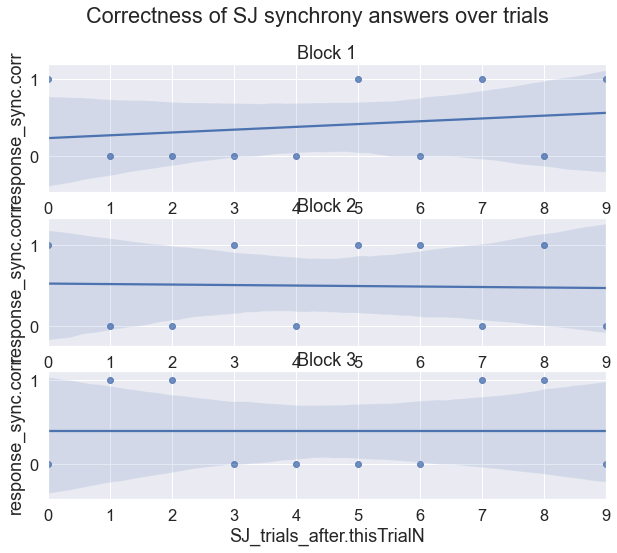

In [63]:
fig, axes = plt.subplots(3, 1)
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='response_sync.corr',
            x = 'SJ_trials_before.thisTrialN',
            data=df,
            truncate = True,
           #logistic = True,
           ax = axes[0])
sns.regplot(y='response_sync.corr',
            x = 'SJ_trials_between.thisTrialN',
            data=df,
            truncate = True,
           #logistic = True,
           ax = axes[1])

sns.regplot(y='response_sync.corr',
            x = 'SJ_trials_after.thisTrialN',
            data=df,
            truncate = True,
           #logistic = True,
           ax = axes[2])


# Change Axis labels:
axes[0].set_title('Block 1')
axes[1].set_title('Block 2')
axes[2].set_title('Block 3')
plt.suptitle('Correctness of SJ synchrony answers over trials')